In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [20]:
startup=pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [21]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
startup=startup.rename({'R&D Spend':'RD','Administration':'AD','Marketing Spend':'MS'},axis=1)
startup

,RD,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [23]:
startup.isnull().sum()

RD        0
AD        0
MS        0
State     0
Profit    0
dtype: int64

In [24]:
startup[startup.duplicated()]

,RD,AD,MS,State,Profit


In [25]:
startup.describe()

,RD,AD,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [33]:
#states not needed for correlation analysis
startup

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Correlation Analysis

In [38]:
c=startup.corr()
c

,RD,AD,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


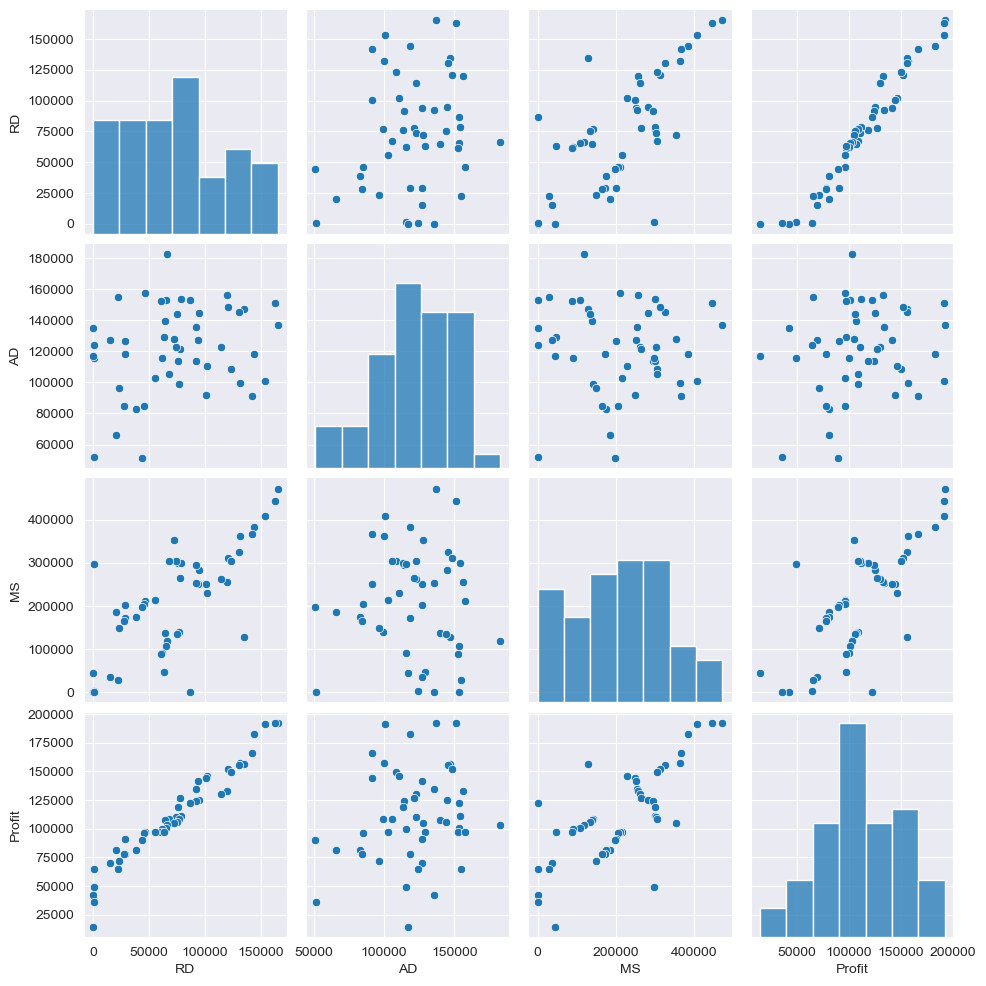

In [40]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

# Model Building

In [41]:
model=smf.ols('Profit~RD+AD+MS',data=startup).fit()

# Model Testing

In [42]:
model.params

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [43]:
#Finding tvalues and pvalues
model.tvalues, np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 AD           -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RD           0.00000
 AD           0.60176
 MS           0.10472
 dtype: float64)

In [44]:
#Finding Squared
model.rsquared, model.rsquared_adj #model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        13:14:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
#Build slr and mlr fo insignificant variables AD and MS
#find their tvalues and pvalues
slr_AD=smf.ols('Profit~AD',data=startup).fit()
slr_AD.tvalues, slr_AD.pvalues

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64)

In [57]:
slr_AD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.162
Time:                        13:50:52   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AD             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
slr_MS=smf.ols('Profit~MS',data=startup).fit()
slr_MS.tvalues, slr_MS.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [59]:
slr_MS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        13:50:55   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
mlr_AM=smf.ols('Profit~AD+MS',data=startup).fit()
mlr_AM.tvalues, mlr_AM.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [63]:
mlr_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           2.50e-10
Time:                        13:55:43   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
AD             0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After build the model together both the columns have significant p value

# Model Validation Technique

# Two Techniques: 1 Collinearity check and Residual Analysis

In [67]:
#Colinearity problem check #Varibles are Profit , RD,AD,MS
#Calculate VIF =1/(1-Rsquare) for all independent variables
rsg_RD=smf.ols('RD~AD+MS',data=startup).fit().rsquared
vif_RD=1/(1-rsg_RD)

rsg_AD=smf.ols('AD~RD+MS',data=startup).fit().rsquared
vif_AD=1/(1-rsg_AD)

rsg_MS=smf.ols('MS~AD+RD',data=startup).fit().rsquared
vif_MS=1/(1-rsg_MS)

#Putting the values in DataFrame Format
d1={'Variables':['RD','AD','MS'],
   'Vif':[vif_RD,vif_AD,vif_MS]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MS,2.326773


None variable has VIF>20, no collinearity, So Consider all vaiable in regression equation

# Residual Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

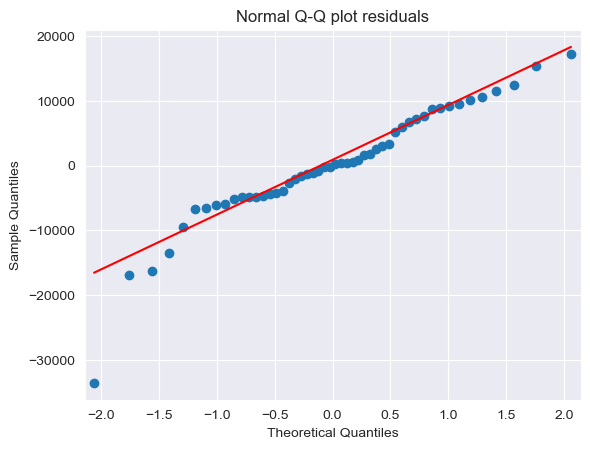

In [70]:
#test for normality of residuals (Q-Q plot) using residual model (model.resid)
qqplot=sm.qqplot(model.resid,line='q') # 'q' A line is fit through the quartile #line ='45' = to draw the 45-degree diagonal
plt.title('Normal Q-Q plot residuals')
plt.show

# Residual plot for Homoscedadticity

In [71]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

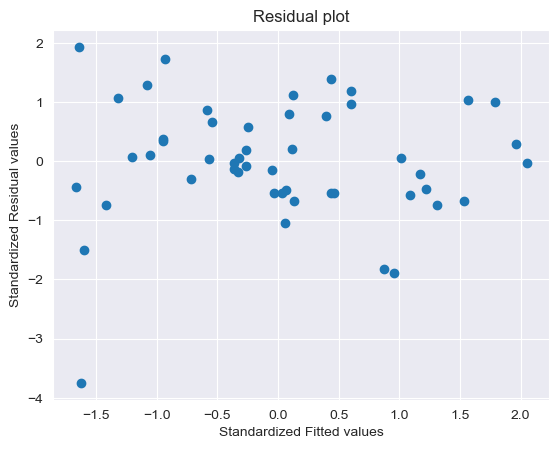

In [72]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual values')
plt.show()

# Residual VS Regressors

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

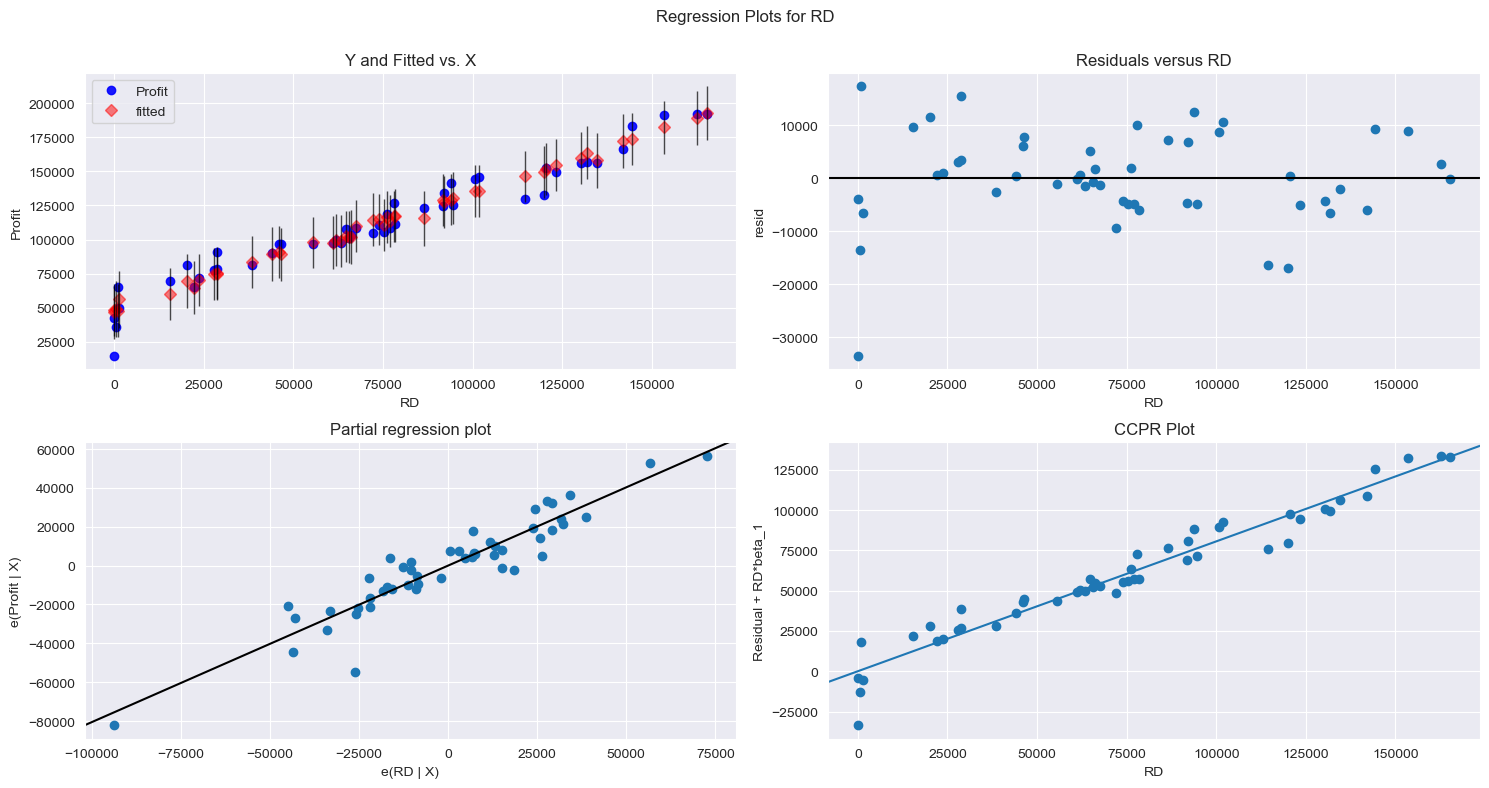

In [75]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

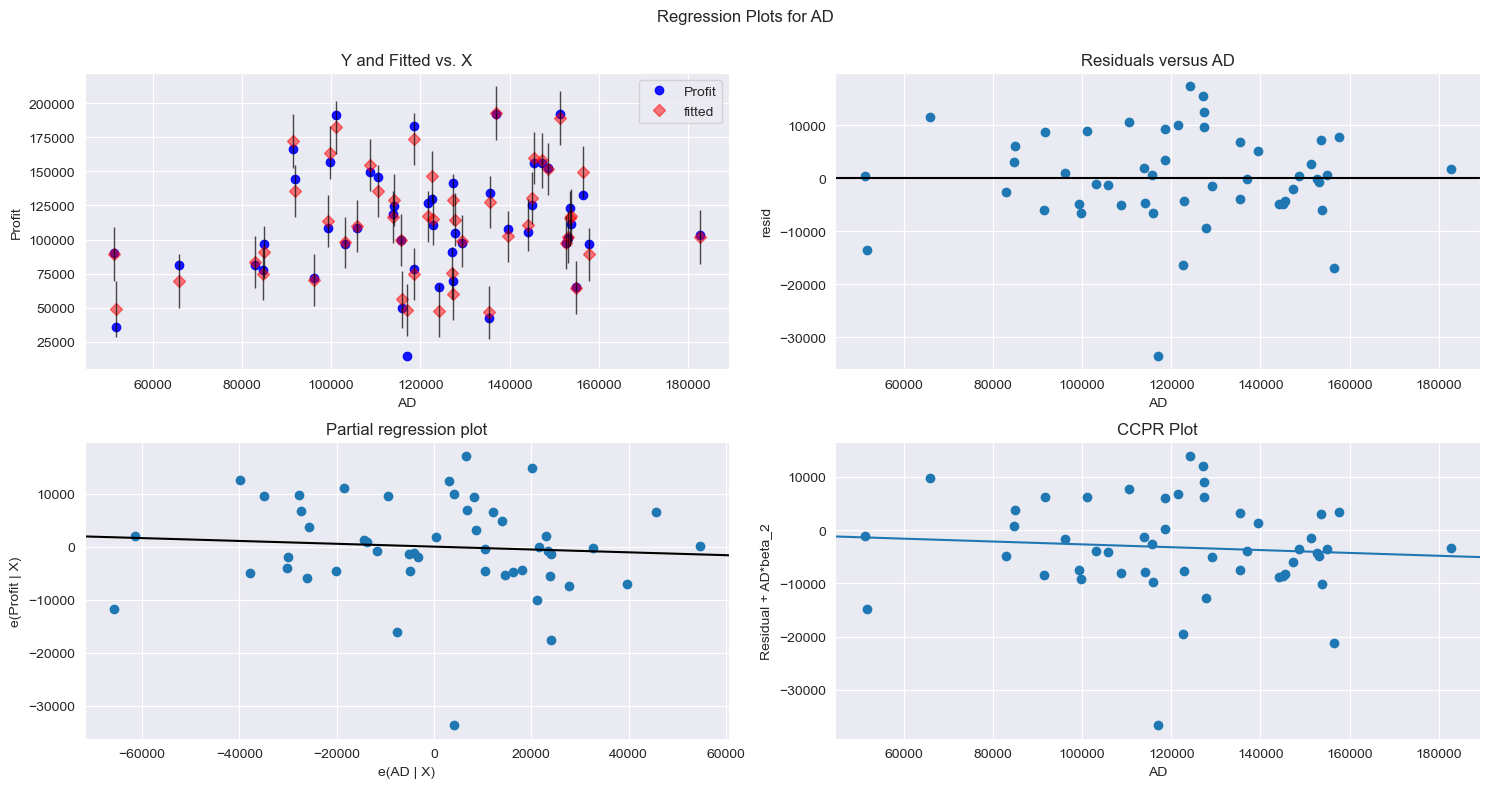

In [76]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"AD",fig=fig)
plt.show

eval_env: 1


<function matplotlib.pyplot.show(close=None, block=None)>

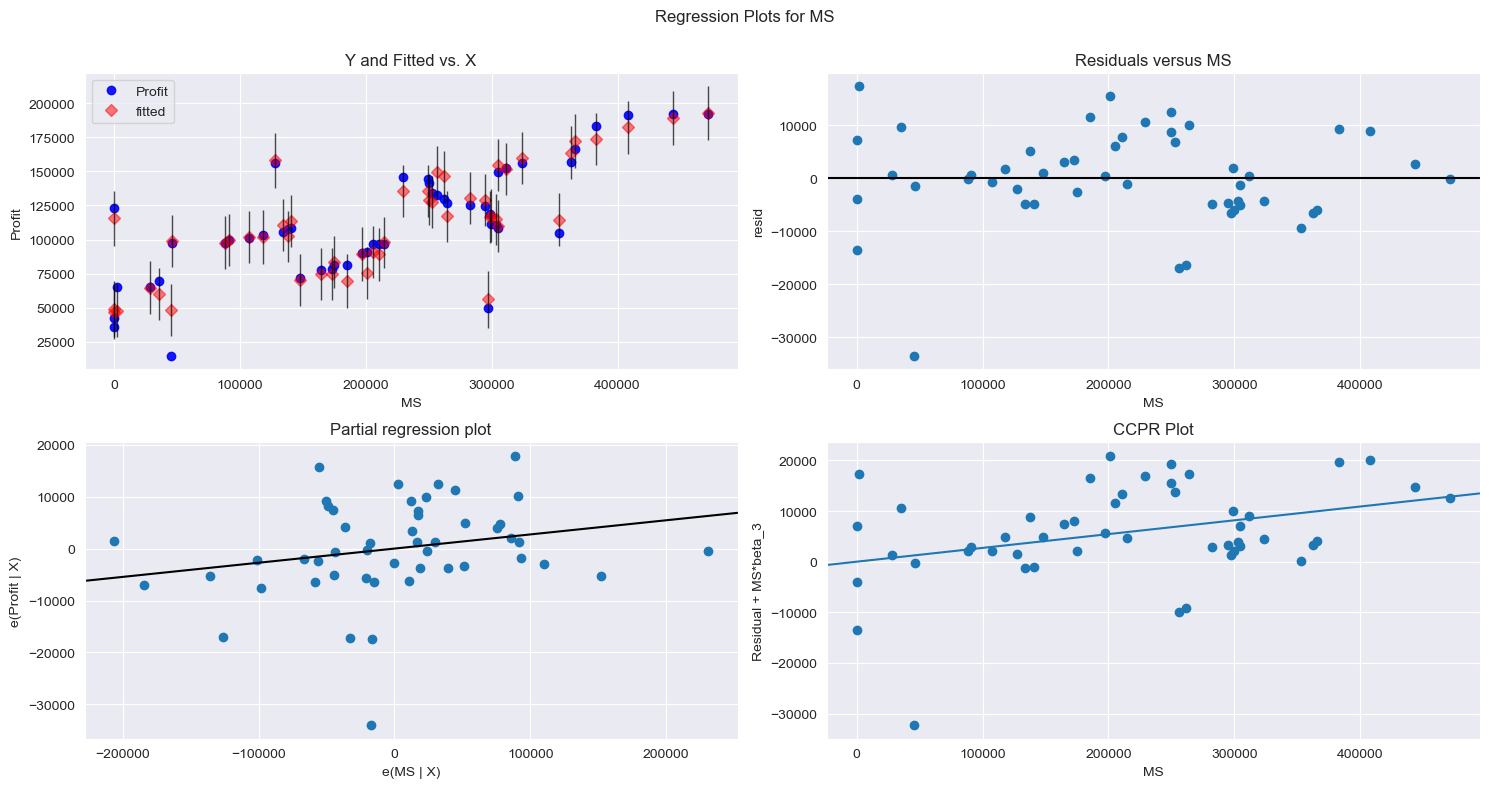

In [77]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook's Distance

In [78]:
K=4
N=50
3*(K+1)/N

0.3

In [79]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

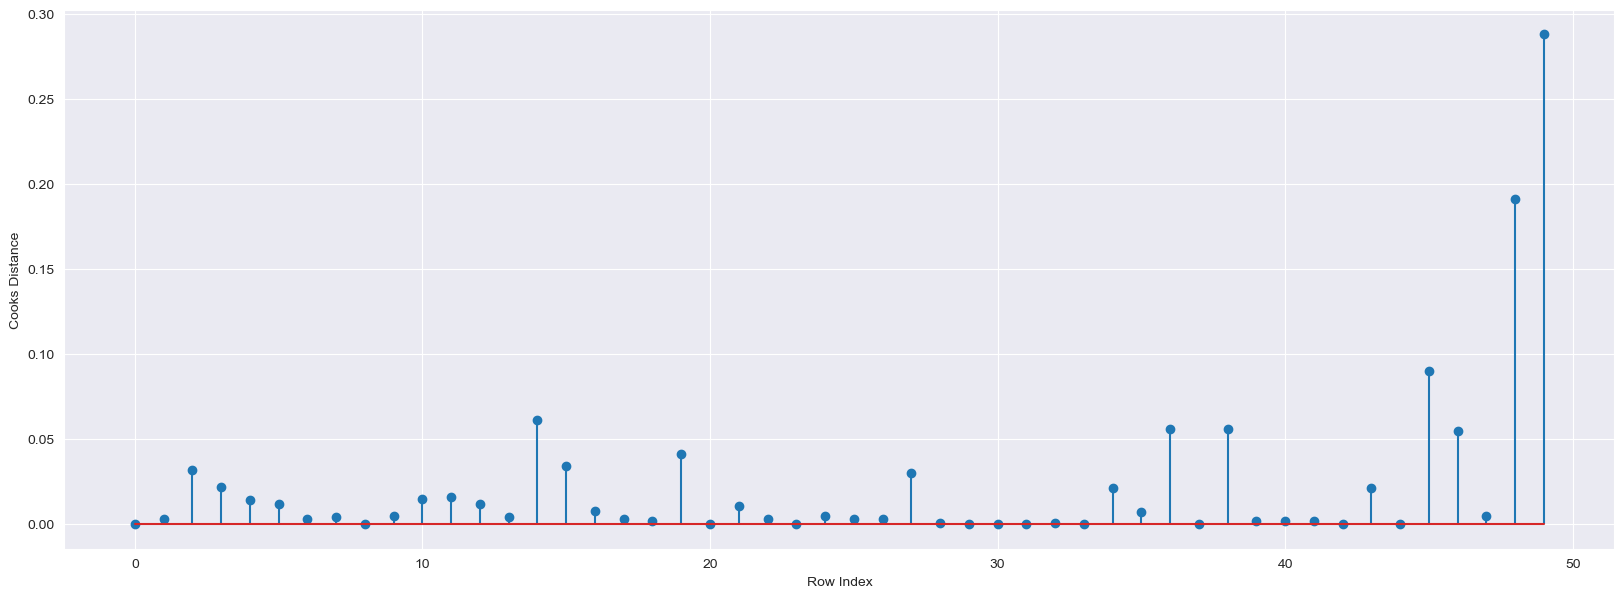

In [81]:
#plot the influencers values using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

there is no data point is greater than 0.5

# High Influence points

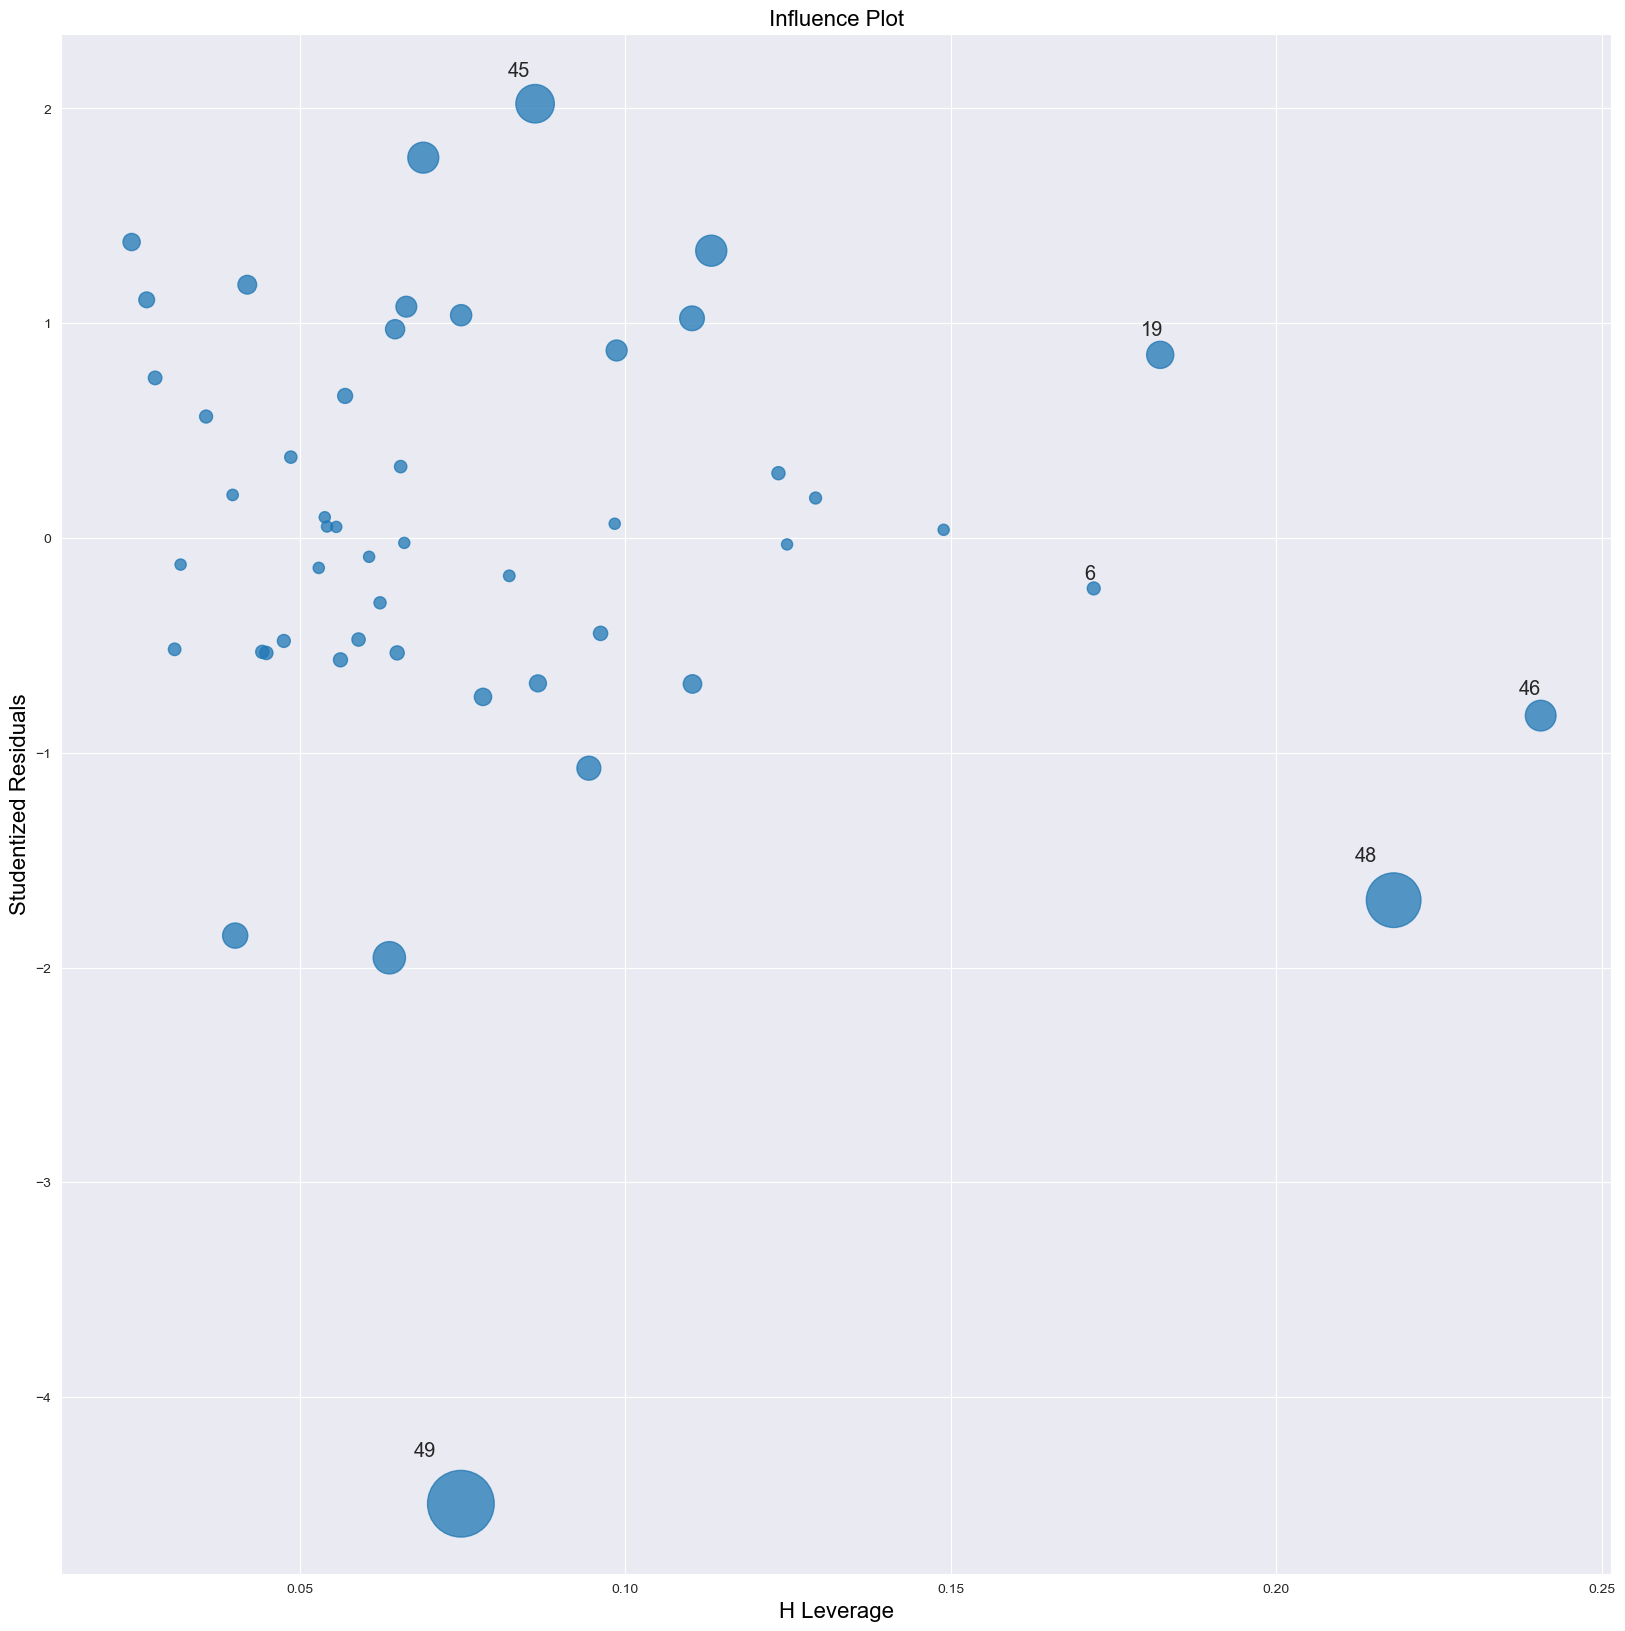

In [82]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [84]:
#Leverage Cutoff value = 3*(k+1)/n ; k=no. of features/coloums & n=no of data points
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30000000000000004

# From the above plot, it is evident that data point 49 are the influencers

In [86]:
startup[startup.index.isin([49])]

,RD,AD,MS,Profit
49,0.0,116983.8,45173.06,14681.4


In [87]:
#See the difference in AD, MS, and Rd 
startup.head()

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [89]:
st1=startup.copy()
st1

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [91]:
#Discard the data point which are influencers and reasign the row number (reset_index())
st1=st1.drop(st1.index[[49]],axis=0).reset_index(drop=True)
st1

,RD,AD,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Build Model

In [92]:
final_ml=smf.ols('Profit~RD+AD+MS',data=st1).fit()

In [94]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        15:13:05   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the model has been improved to 96.1%